# Question 1

## Part A
1. Define and Fit Polynomial Functions
2. Define Corresponding Sigma Functions
3. Plot the Polynomials and Sigma Functions

### 1. Define and Fit Polynomial Functions

In [54]:
import numpy as np

# Define Data
x = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0])
y = np.array([2.7, 3.9, 5.5, 5.8, 6.5, 6.4, 7.7, 8.5, 8.7])
sig = np.array([0.3, 0.5, 0.7, 0.6, 0.4, 0.3, 0.7, 0.9, 0.5])

# Define Polynomial Functions
def polynomial(xs: np.array, *coefficients):
    ys = np.zeros(len(xs))
    for i in range(len(coefficients)):
        ys += coefficients[i]*(xs**i)
    return ys

In [5]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Fit Polynomial Function
def fit(num_of_coefficients):
    popt, pcov = curve_fit(polynomial, x, y,[0 for i in range(num_of_coefficients)], sig, absolute_sigma=True)
    return lambda x : polynomial(x, *popt), pcov
f1, f1cov = fit(2)
f2, f2cov = fit(3)
f3, f3cov = fit(4)
print(f3cov)

[[ 7.21902828e-01 -6.83322065e-01  1.53642655e-01 -9.71824857e-03]
 [-6.83322065e-01  7.23117401e-01 -1.68898351e-01  1.08960124e-02]
 [ 1.53642655e-01 -1.68898351e-01  4.03676576e-02 -2.64743181e-03]
 [-9.71824857e-03  1.08960124e-02 -2.64743181e-03  1.76118529e-04]]


### 2. Define Sigma Functions

In [6]:
# Make Sigma Functions for each Polynomials
from math import sqrt
from itertools import product

def sigma_function(co_variance_matrix, partial_derivatives):
    i_list = [i for i in range(co_variance_matrix.shape[0])]
    j_list = [i for i in range(co_variance_matrix.shape[1])]
    term = lambda ij: \
            lambda x: partial_derivatives[ij[0]](x)*partial_derivatives[ij[1]](x)*co_variance_matrix[ij[0]][ij[1]]
    variance = lambda x: sum(map(lambda func: func(x),
                                 map(term, product(i_list, j_list)) # Terms in terms of functions of x
                                 ) # Evaluated terms
                             )
    return lambda x: sqrt(variance(x))

partial_derivatives = [
    lambda x: 1,
    lambda x: x,
    lambda x: x**2,
    lambda x: x**3,
]
sigmaf1 = sigma_function(f1cov, partial_derivatives)
sigmaf2 = sigma_function(f2cov, partial_derivatives)
sigmaf3 = sigma_function(f3cov, partial_derivatives)

### 3. Plot the Polynomials and Standard Deviations

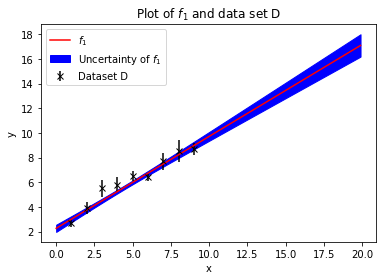

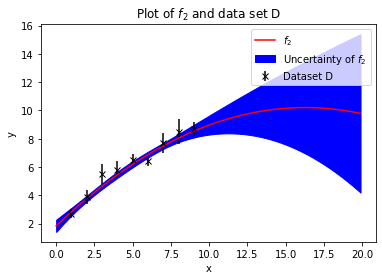

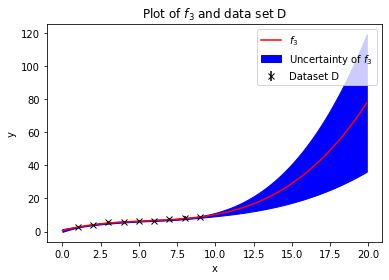

9
0.38804052021355345
0.4628583700903134
0.7107245439722248


In [68]:
#%matplotlib qt
def plot(polynomial_order, func, sigma):
    plt.title(f"Plot of $f_{polynomial_order}$ and data set D")
    plt.xlabel("x")
    plt.ylabel("y")
    x_line = np.arange(0, 20, 0.1)

    plt.errorbar(x, y, yerr= sig, linestyle="", marker="x", color="black", label="Dataset D")
    plt.plot(x_line, func(x_line), color="red", label=f"$f_{polynomial_order}$")
    plt.fill_between(x_line, func(x_line)+list(map(sigma, x_line)), func(x_line)-list(map(sigma, x_line)), color="blue", label=f"Uncertainty of $f_{polynomial_order}$")
    plt.legend()
    plt.show()

plot("1", f1, sigmaf1)
plot("2", f2, sigmaf2)
plot("3", f3, sigmaf3)

print(len(x))
print(chi2.sf(x=chi_square(x, y, sig, lambda x: f1(np.array([x]))[0]), df=len(x)-2))
print(chi2.sf(x=chi_square(x, y, sig, lambda x: f2(np.array([x]))[0]), df=len(x)-3))
print(chi2.sf(x=chi_square(x, y, sig, lambda x: f3(np.array([x]))[0]), df=len(x)-4))


## Error Propagation of Composite Function

a=5, b=6: Delta = 0.1821910074367229
a=5, b=10: Delta = 1.0852087788754348
a=5, b=20: Delta = 42.41681582495673


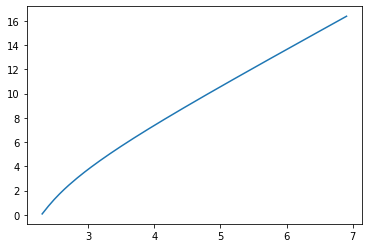

In [8]:
# Make Sigma Functions for each Polynomials
import math

def sigma_function(co_variance_matrix, partial_derivatives):
    i_list = [i for i in range(co_variance_matrix.shape[0])]
    j_list = [i for i in range(co_variance_matrix.shape[1])]
    term = lambda ij: \
        lambda a,b: partial_derivatives[ij[0]](a,b)*partial_derivatives[ij[1]](a,b)*co_variance_matrix[ij[0]][ij[1]]
    variance = lambda a,b: sum(map(lambda func: func(a,b),
                                 map(term, product(i_list, j_list)) # Terms in terms of functions of x
                                 ) # Evaluated terms
                             )
    return lambda a,b: sqrt(variance(a,b))

partial_derivatives = [
    lambda a,b: 0,
    lambda a,b: a-b,
    lambda a,b: a**2-b**2,
    lambda a,b: a**3 - b**3
]

delta_ab = sigma_function(f3cov, partial_derivatives)
print(f"a=5, b=6: Delta = {delta_ab(5, 6)}")
print(f"a=5, b=10: Delta = {delta_ab(5, 10)}")
print(f"a=5, b=20: Delta = {delta_ab(5, 20)}")

#plt.plot([i for i in range(100)], list(map(lambda x: delta_ab(5, x), [i for i in range(100)])))
plt.plot([math.log(i) for i in range(10,1000)], list(map(lambda x: math.log(delta_ab(5, x)), [i for i in range(10, 1000)])))

Compare with $\sigma_{f3}$

In [9]:
print(f"x=5: sigma = {sigmaf3(5)}")
print(f"x=6: sigma = {sigmaf3(6)}")
print(f"x=10: sigma = {sigmaf3(10)}")
print(f"x=20: sigma = {sigmaf3(20)}")

print(f"a=5, b=6: Delta = {delta_ab(5, 6)}")
print(math.sqrt((sigmaf3(5)**2) + (sigmaf3(6)**2)))

x=5: sigma = 0.22316983933078835
x=6: sigma = 0.2392480561519598
x=10: sigma = 1.0447606288233466
x=20: sigma = 42.44120598595091
a=5, b=6: Delta = 0.1821910074367229
0.32717641962620286


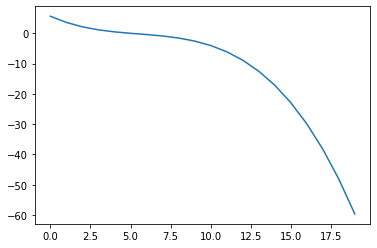

In [10]:
plt.plot([i for i in range(20)], f3(np.array([5 for i in range(20)]))-f3(np.array([i for i in range(20)])))

Question 2

In [11]:
h = np.array([1000, 828, 800, 600, 300])
d = np.array([1500, 1340, 1328, 1172, 800])
sig = [15 for i in range(5)]

hypothesis1 = lambda h, alpha: alpha*h
hypothesis2 = lambda h, alpha, beta: alpha*h + beta*(h**2)
hypothesis3 = lambda h, alpha, beta: alpha*(h**beta)

popt1, popcov = curve_fit(hypothesis1, h, d, [0], sig, absolute_sigma=True)
print("Hypothesis 1")
print("Alpha: ", popt1)

popt2, popcov = curve_fit(hypothesis2, h, d, [0, 0], sig, absolute_sigma=True)
print("Hypothesis 2")
print("Alpha: ", popt2[0])
print("Beta: ", popt2[1])

popt3, popcov = curve_fit(hypothesis3, h, d, [0, 0], sig, absolute_sigma=True)
print("Hypothesis 3")
print("Alpha: ", popt3[0])
print("Beta: ", popt3[1])

Hypothesis 1
Alpha:  [1.66275638]
Hypothesis 2
Alpha:  2.7929207500101834
Beta:  -0.0013505469376991343
Hypothesis 3
Alpha:  43.760589565828234
Beta:  0.5110560150125866


Text(0, 0.5, 'd, punto')

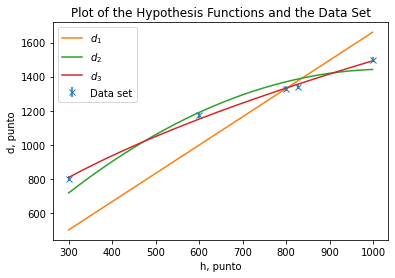

In [51]:
plt.errorbar(h, d, yerr=sig, linestyle="", marker="x", label="Data set")
hline = np.arange(min(h), max(h))
plt.title("Plot of the Hypothesis Functions and the Data Set")
plt.plot(hline, hypothesis1(hline, *popt1), label="$d_1$")
plt.plot(hline, hypothesis2(hline, *popt2), label="$d_2$")
plt.plot(hline, hypothesis3(hline, *popt3), label="$d_3$")
plt.legend()
plt.xlabel("h, punto")
plt.ylabel("d, punto")

In [52]:
from scipy.stats import chi2
def chi_square(xs:list, ys: list, dys:list,  model):
    chi_square = 0
    assert len(xs) == len(ys) == len(dys)
    for i in range(len(xs)):
        chi_square += ((ys[i]-model(xs[i])) / dys[i])**2
    return chi_square

chi_square1 = chi_square(h, d, sig, lambda h: hypothesis1(h, *popt1))
chi_square2 = chi_square(h, d, sig, lambda h: hypothesis2(h, *popt2))
chi_square3 = chi_square(h, d, sig, lambda h: hypothesis3(h, *popt3))

print(chi_square1/degree_of_freedom1)
print(chi_square2/degree_of_freedom2)
print(chi_square3/ degree_of_freedom3)

degree_of_freedom1 = len(h)-1   # Degree of freedom = num of datapoints - num of params
p_value1 = chi2.sf(x=chi_square1, df=1)

degree_of_freedom2 = len(h)-2
p_value2 = chi2.sf(x=chi_square2, df=degree_of_freedom2)

degree_of_freedom3 = len(h)-2
p_value3 = chi2.sf(x=chi_square3, df=degree_of_freedom3)
print(p_value1, p_value2, p_value3)

165.49753617897275
21.580605120075727
1.2519761533914704
5.514768075289029e-146 5.696198137766921e-14 0.28905417499017605


In [ ]:
import math.sqrt
newtons_prediction = lambda h, alpha: math.sqrt(h)*alpha

plt.plot(newtons_prediction(h))

In [ ]:
a = [ 0.08566876, 0.01449377, 0.01449377, 0.00332229]
sum(a)
# 0.11527868872836658
sum([1, 0, 0, 0])

In [ ]:
def addition(n):
    return n + n

# We double all numbers using map()
numbers = (1, 2, 3, 4)
result = map(addition, numbers)
print(sum(result))

In [ ]:
# Note you can not append closures to a list, must use mapping
# Note if you do not want a map to be exaustive, you have to write a closer that makes the map as part of the closure